Importing the Libraries 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Importing the data

In [73]:
iris = pd.read_excel("flame.xlsx")
x = iris.iloc[:, [0, 1]].values

target = iris.iloc[:,2].values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)


Viewing the Data

In [74]:
x

array([[ 1.35, 26.65],
       [ 1.4 , 23.25],
       [ 0.85, 23.05],
       [ 0.5 , 22.35],
       [ 0.65, 21.35],
       [ 1.1 , 22.05],
       [ 1.35, 22.65],
       [ 1.95, 22.8 ],
       [ 2.4 , 22.45],
       [ 1.8 , 22.  ],
       [ 2.5 , 21.85],
       [ 2.95, 21.4 ],
       [ 1.9 , 21.25],
       [ 1.35, 21.45],
       [ 1.35, 20.9 ],
       [ 1.25, 20.35],
       [ 1.75, 20.05],
       [ 2.  , 20.6 ],
       [ 2.5 , 21.  ],
       [ 1.7 , 19.05],
       [ 2.4 , 20.05],
       [ 3.05, 20.45],
       [ 3.7 , 20.45],
       [ 3.45, 19.9 ],
       [ 2.95, 19.5 ],
       [ 2.4 , 19.4 ],
       [ 2.4 , 18.25],
       [ 2.85, 18.75],
       [ 3.25, 19.05],
       [ 3.95, 19.6 ],
       [ 2.7 , 17.8 ],
       [ 3.45, 18.05],
       [ 3.8 , 18.55],
       [ 4.  , 19.1 ],
       [ 4.45, 19.9 ],
       [ 4.65, 19.15],
       [ 4.85, 18.45],
       [ 4.3 , 18.05],
       [ 3.35, 17.3 ],
       [ 3.7 , 16.3 ],
       [ 4.4 , 16.95],
       [ 4.25, 17.4 ],
       [ 4.8 , 17.65],
       [ 5.

Viewing the target

In [75]:
target

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Ploting the data according to target 

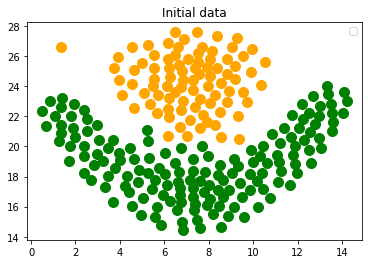

In [76]:
plt.scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
plt.scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
plt.title('Initial data')


plt.legend()
plt.show()

finding the exact value epsilon

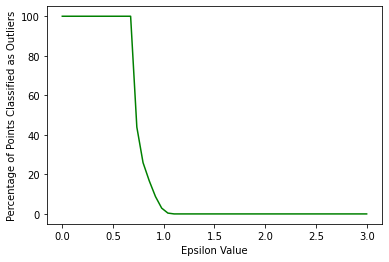

In [77]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=44)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");
plt.show()


Applying  DBSCAN

In [80]:
m = DBSCAN(eps=0.5, min_samples=4)
ydbscan=m.fit_predict(scaled_df)

Viewing the the cluster formation

In [81]:
ydbscan

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Ploting the clusturing result

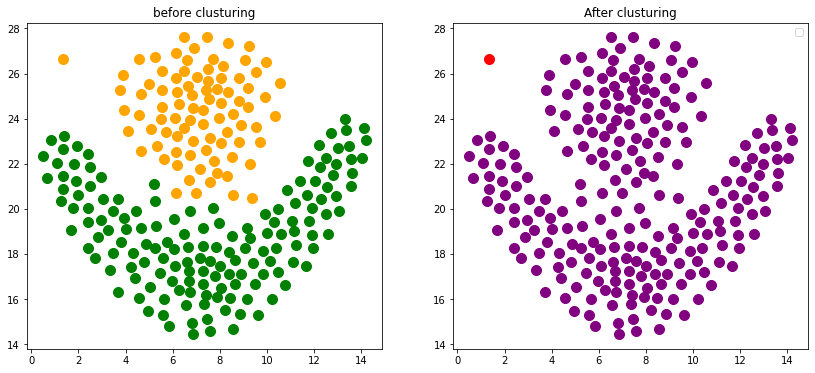

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[1].scatter(x[ydbscan == 0, 0], x[ydbscan == 0, 1], s = 100, c = 'purple')
axes[1].scatter(x[ydbscan == -1, 0], x[ydbscan == -1, 1], s = 100, c = 'red')


axes[1].set_title('After clusturing')
axes[0].scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
axes[0].scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
axes[0].scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
axes[0].scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
axes[0].scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
axes[0].scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
axes[0].set_title('before clusturing')




plt.legend()
plt.show()

In [86]:
print(pd.crosstab(target,ydbscan))

col_0  -1    0
row_0         
1       1   85
2       0  153
